In [2]:
import networkx as nx
import operator
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.path as mpath
import time

G=nx.Graph()

#read edges from csv file
file_edges=open("4-edges.csv", "r")
while(1):
    content = file_edges.readline()
    if content == "":
        break
    line = content.split(",")
    #print(line[0], line[1], line[2])
    G.add_edge(line[0], line[1]) #add weighted edges to Graph

number_of_nodes = G.number_of_nodes()

av_degree = (2*G.number_of_edges())/number_of_nodes # av_degree = 2*E/N ignoring this is a weighted graph


#CENTRALITY

t1=time.time()
dg_centrality = nx.degree_centrality(G)
t2=time.time()-t1

print(t2)
#for k,v in sorted(dg_centrality.items(), key=lambda p:p[1], reverse=True):
    #print(k,v)

t3=time.time()
ev_centrality = nx.eigenvector_centrality_numpy(G)
t4=time.time()-t3

print(t4)
#for k,v in sorted(ev_centrality.items(), key=lambda p:p[1], reverse=True):
    #print(k,v)

t5=time.time()
bn_centrality = nx.betweenness_centrality(G)
t6=time.time()-t5

print(t6)


0.008536815643310547
10.153223514556885
12553.733306884766


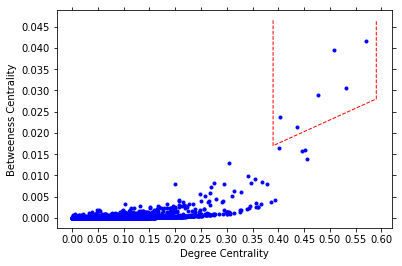

In [32]:
#x=list(ev_centrality.values())
y=list(bn_centrality.values())
x=list(dg_centrality.values())
#y=list(bn_centrality.values())

points = np.column_stack([x, y])
verts = np.array([[0.033, 0.033, 0.047, 0.047, ], [max(y)+0.005, 0.019, 0.030, max(y)+0.005]]).T
path = mpath.Path(verts)
points_inside = points[path.contains_points(points)]

plt.figure()
plt.autoscale(enable=True, axis='y', tight=False)
plt.autoscale(enable=True, axis='x', tight=False)
plt.xticks(np.arange(min(x), max(x)+0.05, 0.05))
plt.yticks(np.arange(min(y), max(y)+0.005, 0.005))
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.ylabel("Betweeness Centrality")
#plt.xlabel("EigenVector Centrality")
plt.xlabel("Degree Centrality")
#plt.ylabel("Betweeness Centrality")


plt.plot(x, y, color='b', marker='o', linestyle="None", markersize=3)
#plt.savefig('dgVSbn.png')


plt.plot([0.39, 0.39, 0.59, 0.59, ], [max(y)+0.005, 0.017, 0.028, max(y)+0.005], color='r', linewidth=1, linestyle='--')
plt.scatter(points_inside[:,0], points_inside[:,1], c='r', s=25)
plt.savefig('dgVSbn_redzoom.png')


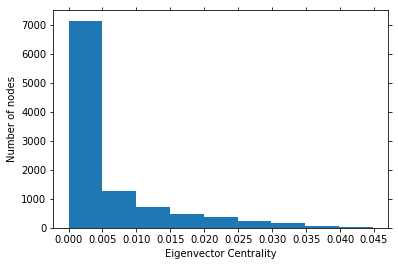

In [37]:
#Individual Histogram of Eigenvector Centrality
x=list(ev_centrality.values())

plt.figure()
plt.hist(list(ev_centrality.values()), bins=9)
plt.xlabel("Eigenvector Centrality")
plt.ylabel("Number of nodes")
plt.xticks(np.arange(min(x), max(x)+0.005, 0.005))

plt.savefig("ev_hist.png")



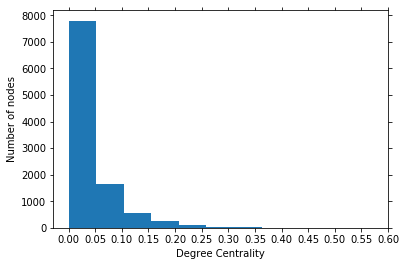

In [36]:
#Individual Histogram of Degree Centrality
x=list(dg_centrality.values())

plt.figure()
plt.hist(list(dg_centrality.values()), bins=11)
plt.xlabel("Degree Centrality")
plt.ylabel("Number of nodes")
plt.xticks(np.arange(min(x), max(x)+0.05, 0.05))

plt.savefig("dg_hist.png")


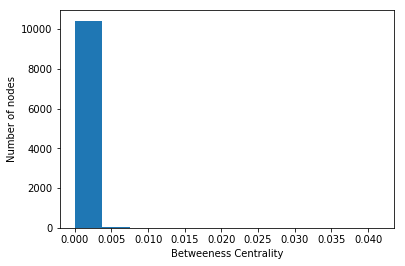

In [20]:
#Individual Histogram of Betweeness Centrality
x=list(bn_centrality.values())

plt.figure()
plt.hist(list(bn_centrality.values()), bins=11)
plt.xlabel("Betweeness Centrality")
plt.ylabel("Number of nodes")
plt.xticks(np.arange(min(x), max(x), 0.005))

plt.savefig("bn_hist.png")


In [86]:
#Save g to the file my_graph.graphml in graphml format
#prettyprint will make it nice for a human to read
nx.write_graphml(G,"my_graph.graphml",prettyprint=True)

#Layout G with the Fruchterman-Reingold force-directed
#algorithm and save the result to my_graph.png
#with_labels will label each node with its id

nx.spring_layout(G, scale=3)
nx.draw_spring(G,with_labels=True)
plt.savefig("my_graph.png")
plt.clf() #Clear plot
